<center><h1>Chunduri_Aditya_Project</h1></center>

Name: Chunduri Aditya
<br>
Github Username: Chunduri-Aditya
<br>
USC ID: 8726443356

In [1]:
import pandas as pd
import numpy as np
import os
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import Loss
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

## (a)

In [2]:
pos_reviews_path = "Datasets/Project_data/pos/"
neg_reviews_path = "Datasets/Project_data/neg/"

## (b) Data Exploration and Pre-processing

### (i), (ii), (iii)

In [3]:
pos_train_data = []
pos_test_data = []
neg_train_data = []
neg_test_data = []

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()  
    text = text.replace('\n', ' ')  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Positive Reviews
for filename in sorted(os.listdir(pos_reviews_path)):
    if filename.startswith('cv') and filename.endswith('.txt'):
        index = int(re.search(r'\d+', filename).group()) 
        with open(os.path.join(pos_reviews_path, filename), 'r', encoding='utf-8') as file:
            review = clean_text(file.read())
            if index < 700:
                pos_train_data.append(review)
            else:
                pos_test_data.append(review)

# Negative Reviews                
for filename in sorted(os.listdir(neg_reviews_path)):
    if filename.startswith('cv') and filename.endswith('.txt'):
        index = int(re.search(r'\d+', filename).group()) 
        with open(os.path.join(neg_reviews_path, filename), 'r', encoding='utf-8') as file:
            review = clean_text(file.read())
            if index < 700:
                neg_train_data.append(review)
            else:
                neg_test_data.append(review)      

train_data = pos_train_data + neg_train_data          
test_data = pos_test_data + neg_test_data
all_review_data = train_data + test_data
train_labels = [1] * len(pos_train_data) + [-1] * len(neg_train_data)
test_labels = [1] * len(pos_test_data) + [-1] * len(neg_test_data)
all_review_labels = train_labels + test_labels

In [4]:
print(len(pos_train_data),len(pos_test_data),len(neg_train_data),len(neg_test_data))

700 300 700 300


### (iv)

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_review_data)
unique_words = len(tokenizer.word_index)
print(f"Number of unique words: {unique_words}")

Number of unique words: 46642


### (v)

In [6]:
review_lengths = [len(review.split()) for review in all_review_data]
avg_review_lengths = np.mean(review_lengths)
std_review_lenghts = np.std(review_lengths)

print(f'Average review length: {avg_review_lengths}')
print(f'Standard deviation of review lengths: {std_review_lenghts}')

Average review length: 352.5125
Standard deviation of review lengths: 152.23633877543824


### (vi)

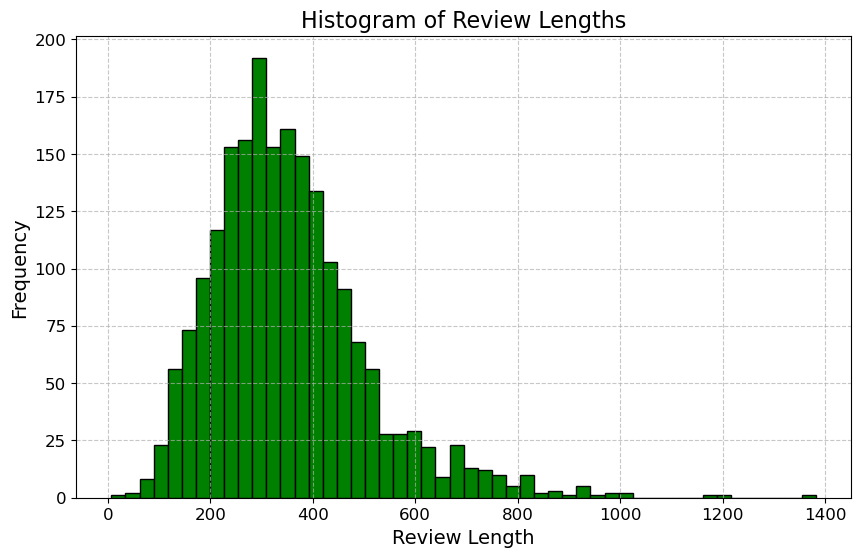

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='green', edgecolor='black')
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Review Lengths', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### (vii)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_review_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

print(train_sequences[:2])

[[9, 2620, 249, 1513, 929, 517, 518, 216, 7534, 592, 4659, 1633, 7131, 1208, 287, 4825, 10708, 1655, 1656, 60, 55, 31, 22, 249, 296, 4, 393, 9844, 738, 1232, 1680, 828, 1392, 763, 3827, 178, 33, 430, 7132, 105, 158, 274, 27196, 84, 1680, 1392, 1759, 27197, 730, 385, 13093, 10, 4, 705, 220, 1111, 2017, 80, 23, 1112, 296, 1429, 413, 4826, 99, 1113, 331, 9138, 85, 20792, 527, 38, 6787, 1, 1985, 14, 294, 178, 249, 296, 83, 127, 92, 42, 6468, 2684, 11802, 764, 2734, 912, 2467, 227, 2467, 510, 1844, 52, 82, 2846, 971, 7994, 357, 19, 131, 27198, 64, 1844, 1, 89, 156, 4504, 519, 22, 880, 918, 578, 1489, 7535, 277, 1141, 892, 795, 4504, 376, 117, 20793, 14845, 3192, 49, 13094, 27199, 134, 20794, 274, 20795, 2017, 14, 23, 3116, 1027, 6788, 13095, 3433, 20796, 7995, 17, 4827, 230, 13096, 414, 27200, 3720, 13097, 60, 65, 1209, 2965, 10709, 20797, 1657, 2735, 2337, 3117, 213, 20797, 10710, 13098, 943, 9139, 258, 17234, 11803, 3434, 20798, 20799, 327, 5870, 20793, 3946, 2018, 275, 893, 1430, 3614, 2

In [9]:
word_index = tokenizer.word_index
print(f"Number of unique words: {len(word_index)}")
print(f"\nFirst 10 words in the index: {list(word_index.items())[:100]}")

Number of unique words: 46642

First 10 words in the index: [('film', 1), ('one', 2), ('movie', 3), ('like', 4), ('even', 5), ('good', 6), ('time', 7), ('story', 8), ('films', 9), ('would', 10), ('much', 11), ('also', 12), ('characters', 13), ('get', 14), ('character', 15), ('two', 16), ('first', 17), ('see', 18), ('well', 19), ('way', 20), ('make', 21), ('really', 22), ('little', 23), ('life', 24), ('plot', 25), ('people', 26), ('movies', 27), ('could', 28), ('bad', 29), ('scene', 30), ('never', 31), ('best', 32), ('new', 33), ('doesnt', 34), ('man', 35), ('many', 36), ('scenes', 37), ('dont', 38), ('know', 39), ('hes', 40), ('great', 41), ('another', 42), ('love', 43), ('action', 44), ('go', 45), ('us', 46), ('director', 47), ('something', 48), ('end', 49), ('still', 50), ('back', 51), ('seems', 52), ('made', 53), ('work', 54), ('theres', 55), ('makes', 56), ('however', 57), ('big', 58), ('years', 59), ('world', 60), ('every', 61), ('though', 62), ('seen', 63), ('better', 64), ('enou

### (viii), (ix)

In [10]:
L_70 = np.percentile(review_lengths, 70)
L_90 = np.percentile(review_lengths, 90)

print(f"Review length at 70th percentile: {L_70}")
print(f"Review length at 90th percentile: {L_90}")

Review length at 70th percentile: 401.0
Review length at 90th percentile: 536.0


## (c) Work Embeddings

In [11]:
vocab_size = 2500

L = int(L_90)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(all_review_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

train_sequences_padded = pad_sequences(train_sequences, maxlen=L, padding='post', truncating='post')
test_sequences_padded = pad_sequences(test_sequences, maxlen=L, padding='post', truncating='post')

print(train_sequences_padded.shape)
print(test_sequences_padded.shape)

(1400, 536)
(600, 536)


In [12]:
class CustomBinaryCrossEntropy(Loss):
    def call(self, y_true, y_pred):
        y_true = (y_true + 1) / 2
        y_true = tf.squeeze(y_true)
        y_pred = tf.squeeze(y_pred)
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        return loss
    
def custom_accuracy(y_true, y_pred):
    y_true = (y_true + 1) / 2
    y_pred = tf.round(y_pred)
    y_true = tf.squeeze(y_true)
    y_pred = tf.squeeze(y_pred)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast(y_true, tf.float64), tf.cast(y_pred, tf.float64)), tf.float64))
    return accuracy

In [13]:
embedding_dim = 32  

model = Sequential()
model.add(Input(shape=(L,))) 
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    embeddings_initializer="uniform", 
                    mask_zero=False))

model.add(Flatten()) 

model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 536, 32)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 17152)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,000 (312.50 KB)

 Trainable params: 80,000 (312.50 KB)

 Non-trainable params: 0 (0.00 B)

## (d)

In [14]:
mlp_model = Sequential()
mlp_model.add(Input(shape=(L,)))
mlp_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
mlp_model.add(Flatten())
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer=Adam(learning_rate=0.0001), loss=CustomBinaryCrossEntropy(), metrics=[custom_accuracy])

mlp_history = mlp_model.fit(np.array(train_sequences_padded), np.array(train_labels), 
                            epochs=2, batch_size=10, validation_data=(np.array(test_sequences_padded), np.array(test_labels)))

mlp_train_acc = mlp_history.history['custom_accuracy'][-1]
mlp_test_acc = mlp_history.history['val_custom_accuracy'][-1]
print(f"MLP Train Accuracy: {mlp_train_acc}")
print(f"MLP Test Accuracy: {mlp_test_acc}")

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - custom_accuracy: 0.5316 - loss: 0.6921 - val_custom_accuracy: 0.5117 - val_loss: 0.6924
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - custom_accuracy: 0.4923 - loss: 0.6968 - val_custom_accuracy: 0.5350 - val_loss: 0.6926
MLP Train Accuracy: 0.4900000989437103
MLP Test Accuracy: 0.5349999666213989


## (e)

In [15]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(L,)))
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(), loss=CustomBinaryCrossEntropy(), metrics=[custom_accuracy])

cnn_history = cnn_model.fit(np.array(train_sequences_padded), np.array(train_labels), 
                            epochs=2, batch_size=10, validation_data=(np.array(test_sequences_padded), np.array(test_labels)))

cnn_train_acc = cnn_history.history['custom_accuracy'][-1]
cnn_test_acc = cnn_history.history['val_custom_accuracy'][-1]
print(f"CNN Train Accuracy: {cnn_train_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")


Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - custom_accuracy: 0.5004 - loss: 0.6989 - val_custom_accuracy: 0.5233 - val_loss: 0.6921
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - custom_accuracy: 0.5504 - loss: 0.6864 - val_custom_accuracy: 0.6767 - val_loss: 0.6571
CNN Train Accuracy: 0.5585715174674988
CNN Test Accuracy: 0.6766666173934937


## (f)

In [16]:
lstm_model = Sequential()
lstm_model.add(Input(shape=(L,)))
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True, embeddings_regularizer='L1L2', embeddings_constraint='MaxNorm'))
lstm_model.add(LSTM(32, dropout=0.2,recurrent_dropout=0.2))
lstm_model.add(Dense(256, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss=CustomBinaryCrossEntropy(), metrics=[custom_accuracy])

lstm_history = lstm_model.fit(np.array(train_sequences_padded), np.array(train_labels), 
                              epochs=20, batch_size=10, validation_data=(np.array(test_sequences_padded), np.array(test_labels)))

lstm_train_acc = lstm_history.history['custom_accuracy'][-1]
lstm_test_acc = lstm_history.history['val_custom_accuracy'][-1]
print(f"LSTM Train Accuracy: {lstm_train_acc}")
print(f"LSTM Test Accuracy: {lstm_test_acc}")

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - custom_accuracy: 0.5177 - loss: 0.7007 - val_custom_accuracy: 0.5283 - val_loss: 0.6780
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - custom_accuracy: 0.6770 - loss: 0.6236 - val_custom_accuracy: 0.5133 - val_loss: 0.6952
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - custom_accuracy: 0.6386 - loss: 0.6393 - val_custom_accuracy: 0.6217 - val_loss: 0.6458
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - custom_accuracy: 0.7085 - loss: 0.6071 - val_custom_accuracy: 0.6133 - val_loss: 0.6607
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - custom_accuracy: 0.6629 - loss: 0.6067 - val_custom_accuracy: 0.6417 - val_loss: 0.6415
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - custom_accuracy: 0.7235 - loss: 0.5847 - val_custom_accuracy: 0.6433 - val_loss: 0.6360
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - custom_accuracy: 0.7011 - loss: 0.5954 - val_custom_accuracy: 0.5000 - val_loss: 0.6981

## References

1) https://stackoverflow.com/questions/72680903/in-keras-tensorflow-how-to-make-a-custom-metric-of-truepositives-minus-falsepos
2) https://keras.io/api/layers/core_layers/embedding/
3) https://stackoverflow.com/questions/45649520/explain-with-example-how-embedding-layers-in-keras-works
4) https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
5) https://www.tensorflow.org/api_docs/python/tf/keras/constraints
6) https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/metrics.py
7) https://stackoverflow.com/questions/72680903/in-keras-tensorflow-how-to-make-a-custom-metric-of-truepositives-minus-falsepos